In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2, min_l1
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *
from functools import partial
import random
import gc

In [4]:
m = 1000
d = 100
N = 10000
active = fourier

ratio_train = 0.7

In [3]:
qs = [1, 2, 3, 4, 5]

In [4]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = fn3(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

seeds = [13, 14, 15]

results_l1_3 = []
results_l2_3 = []
for q in qs:
    res_l1 = []
    res_l2 = []
    for seed in seeds:
        random.seed(seed)
        np.random.seed(seed)

        W = make_W(d, q, N=N, dist=partial(normal, stdev=1))
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)

        c_l1 = min_l1(A_train, y_train)
        c_l2 = min_l2(A_train, y_train)

        res_l1.append(np.linalg.norm(A_test@c_l1 - y_test) / np.linalg.norm(y_test))
        res_l2.append(np.linalg.norm(A_test@c_l2 - y_test) / np.linalg.norm(y_test))

        del W
        del A_train
        del A_test
        del c_l1
        del c_l2

        gc.collect()

    results_l1_3.append(res_l1)
    results_l2_3.append(res_l2)

Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max BB scaling to 0.01
Linesearch failed with error 1. Damping max BB scaling to 0.001
Linesearch failed with error 1. Damping max BB scaling to 0.0001
Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max 

In [5]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = fn6(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

seeds = [18, 19, 20]

results_l1_6 = []
results_l2_6 = []
for q in qs:
    res_l1 = []
    res_l2 = []
    for seed in seeds:
        random.seed(seed)
        np.random.seed(seed)

        W = make_W(d, q, N=N, dist=partial(normal, stdev=1))
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)

        c_l1 = min_l1(A_train, y_train)
        c_l2 = min_l2(A_train, y_train)

        res_l1.append(np.linalg.norm(A_test@c_l1 - y_test) / np.linalg.norm(y_test))
        res_l2.append(np.linalg.norm(A_test@c_l2 - y_test) / np.linalg.norm(y_test))

        del W
        del A_train
        del A_test
        del c_l1
        del c_l2

        gc.collect()

    results_l1_6.append(res_l1)
    results_l2_6.append(res_l2)

Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max BB scaling to 0.01
Linesearch failed with error 1. Damping max BB scaling to 0.001
Linesearch failed with error 1. Damping max BB scaling to 0.0001
Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max 

fn3, l1: [0.19618013542735557, 0.20844658624965703, 0.19581371628280883, 0.20064174249914668, 0.19695506033427648]
fn3, l2: [0.7564561595932049, 0.22975862016196524, 0.2479026339406587, 0.2758482356245682, 0.3091838862003824]


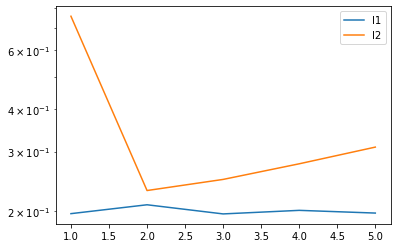

In [6]:
print("fn3, l1: {}".format([np.mean(res) for res in results_l1_3]))
print("fn3, l2: {}".format([np.mean(res) for res in results_l2_3]))
plt.semilogy(qs, [np.mean(res) for res in results_l1_3], label="l1")
plt.semilogy(qs, [np.mean(res) for res in results_l2_3], label="l2")
plt.legend()
plt.show()

fn6, l1: [1.241716234404979, 0.5055212265391086, 0.6158014202773807, 0.6474086755921201, 0.7181521442835734]
fn6, l2: [4.8882270604084725, 1.0696764464916375, 1.0549403207098815, 1.053706385512016, 1.0482242935200672]


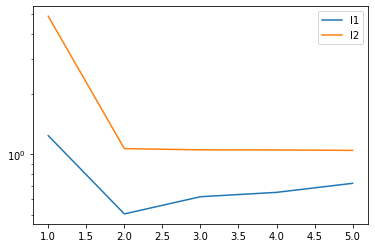

In [7]:
print("fn6, l1: {}".format([np.mean(res) for res in results_l1_6]))
print("fn6, l2: {}".format([np.mean(res) for res in results_l2_6]))
plt.semilogy(qs, [np.mean(res) for res in results_l1_6], label="l1")
plt.semilogy(qs, [np.mean(res) for res in results_l2_6], label="l2")
plt.legend()
plt.show()